In [1]:
import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from scipy.signal import find_peaks
from utils import KymoMomentum, KymoTime
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError, AttributeError):
        from pathlib2 import Path

try:
        import tempfile
        tempfile.TemporaryDirectory
except (ImportError, AttributeError):
       from backports import tempfile

In [2]:
Kymo = '/home/kapoorlab/Downloads/Distance_ColorTestTrackID21.tif'
savedir = '/home/kapoorlab/Downloads/'
Path(savedir).mkdir(exist_ok = True)
Time_unit = 5
Xcalibration = 0.212
#Remove zero end of kymograph
cutEnd = 300
#This is what makes a peak a peak, the height of peaks around this main peak height threshold
Heightthreshold = 0.005



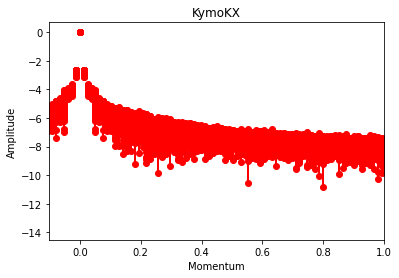

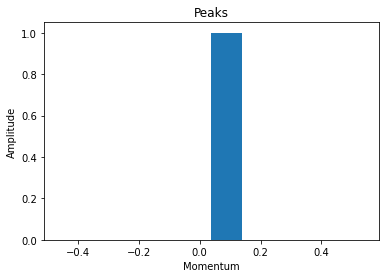

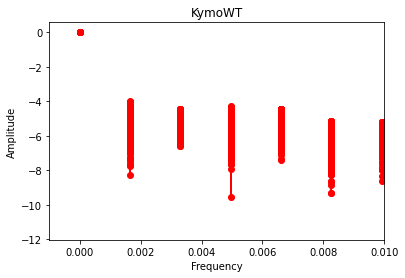

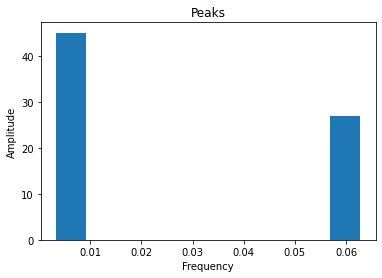

Estimated Velocity 0.08550082644628103 um/s


In [3]:
Kymoimage = imread(Kymo)
Kymoimage = Kymoimage[:Kymoimage.shape[0]-cutEnd,:]
Name = os.path.basename(os.path.splitext(Kymo)[0])
peakKX = KymoMomentum(Kymoimage,Xcalibration, threshold = Heightthreshold)

peakWT = KymoTime(Kymoimage, Time_unit, threshold = Heightthreshold)

Velocity = 0
if peakKX > 0:
 Velocity = peakWT/peakKX

print("Estimated Velocity", Velocity, 'um/s')

df = pd.DataFrame([[Name,Velocity]],columns =['Experiment', 'Velocity'])
df.to_csv(savedir + Name + 'Velocity' +  '.csv', index = False)  